# Internship

In [144]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Preprocessing of Amazon Data:

In [145]:
# Read Amazon Data
df_amazon = pd.read_csv("HistoricalData_AMZN.csv")
df_amazon.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06/08/2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06/07/2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06/04/2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06/03/2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [146]:
# Check Datatypes
df_amazon.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [147]:
# Convert Date Column to Datetime datatype
df_amazon["Date"] = pd.to_datetime(df_amazon["Date"])
print(df_amazon.head())

        Date Close/Last   Volume      Open        High       Low
0 2021-06-09   $3281.15  2455530  $3272.87    $3297.58   $3270.7
1 2021-06-08   $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2 2021-06-07   $3198.01  2215756  $3197.33       $3208   $3172.2
3 2021-06-04   $3206.22  2249749     $3212       $3221  $3198.81
4 2021-06-03   $3187.01  2398293  $3204.23   $3214.435  $3184.03


In [148]:
df_amazon.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [149]:
# Remove "$" Symbol in 'Close/Last', 'Open', 'High', 'Low'
df_amazon["Close/Last"].replace("[$]", "", regex = True, inplace = True)
df_amazon["Open"].replace("[$]", "", regex = True, inplace = True)
df_amazon["High"].replace("[$]", "", regex = True, inplace = True)
df_amazon["Low"].replace("[$]", "", regex = True, inplace = True)

In [150]:
print(df_amazon.head())
print("----------------------------------")
print(df_amazon.dtypes)

        Date Close/Last   Volume     Open       High      Low
0 2021-06-09    3281.15  2455530  3272.87    3297.58   3270.7
1 2021-06-08    3264.11  3416730  3222.61  3279.5321  3218.01
2 2021-06-07    3198.01  2215756  3197.33       3208   3172.2
3 2021-06-04    3206.22  2249749     3212       3221  3198.81
4 2021-06-03    3187.01  2398293  3204.23   3214.435  3184.03
----------------------------------
Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object


In [151]:
# Convert 'Close/Last', 'Open', 'High', 'Low' to numeric columns
df_amazon["Close/Last"] = pd.to_numeric(df_amazon["Close/Last"])
df_amazon["Open"] = pd.to_numeric(df_amazon["Open"])
df_amazon["High"] = pd.to_numeric(df_amazon["High"])
df_amazon["Low"] = pd.to_numeric(df_amazon["Low"])

In [152]:
print(df_amazon.head())

        Date  Close/Last   Volume     Open       High      Low
0 2021-06-09     3281.15  2455530  3272.87  3297.5800  3270.70
1 2021-06-08     3264.11  3416730  3222.61  3279.5321  3218.01
2 2021-06-07     3198.01  2215756  3197.33  3208.0000  3172.20
3 2021-06-04     3206.22  2249749  3212.00  3221.0000  3198.81
4 2021-06-03     3187.01  2398293  3204.23  3214.4350  3184.03


In [153]:
# Create "Symbol" column and "Sector" column
df_amazon["Symbol"] = "AMZN"
df_amazon["Sector"] = "Consumer_Services"

In [154]:
df_amazon.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector
0,2021-06-09,3281.15,2455530,3272.87,3297.5800,3270.70,AMZN,Consumer_Services
1,2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01,AMZN,Consumer_Services
2,2021-06-07,3198.01,2215756,3197.33,3208.0000,3172.20,AMZN,Consumer_Services
3,2021-06-04,3206.22,2249749,3212.00,3221.0000,3198.81,AMZN,Consumer_Services
4,2021-06-03,3187.01,2398293,3204.23,3214.4350,3184.03,AMZN,Consumer_Services


In [155]:
# Adding Target Column whether stoct price increased or decreased
targets = []
for i in range(len(df_amazon)-1):
    if df_amazon["Close/Last"].iloc[i] > df_amazon["Close/Last"].iloc[i+1]:
        targets.append("Increased")
    else:
        targets.append("Decreased")
df_amazon_cleaned = pd.concat([df_amazon, pd.DataFrame({"Target" : targets})], axis = 1)
df_amazon_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,3281.15,2455530,3272.87,3297.5800,3270.70,AMZN,Consumer_Services,Increased
1,2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01,AMZN,Consumer_Services,Increased
2,2021-06-07,3198.01,2215756,3197.33,3208.0000,3172.20,AMZN,Consumer_Services,Decreased
3,2021-06-04,3206.22,2249749,3212.00,3221.0000,3198.81,AMZN,Consumer_Services,Increased
4,2021-06-03,3187.01,2398293,3204.23,3214.4350,3184.03,AMZN,Consumer_Services,Decreased


In [156]:
# Check for Null values
df_amazon_cleaned.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Symbol        0
Sector        0
Target        1
dtype: int64

In [157]:
# Look where Nan in the dataset
df_amazon_cleaned[df_amazon_cleaned["Target"].isnull()]

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
2515,2011-06-10,186.53,3753267,189.25,190.77,186.28,AMZN,Consumer_Services,NaN


In [158]:
# As only one row is empty drop it
df_amazon_cleaned = df_amazon_cleaned.dropna()
df_amazon_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,3281.15,2455530,3272.87,3297.5800,3270.70,AMZN,Consumer_Services,Increased
1,2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01,AMZN,Consumer_Services,Increased
2,2021-06-07,3198.01,2215756,3197.33,3208.0000,3172.20,AMZN,Consumer_Services,Decreased
3,2021-06-04,3206.22,2249749,3212.00,3221.0000,3198.81,AMZN,Consumer_Services,Increased
4,2021-06-03,3187.01,2398293,3204.23,3214.4350,3184.03,AMZN,Consumer_Services,Decreased


In [159]:
df_amazon_cleaned.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Symbol        0
Sector        0
Target        0
dtype: int64

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

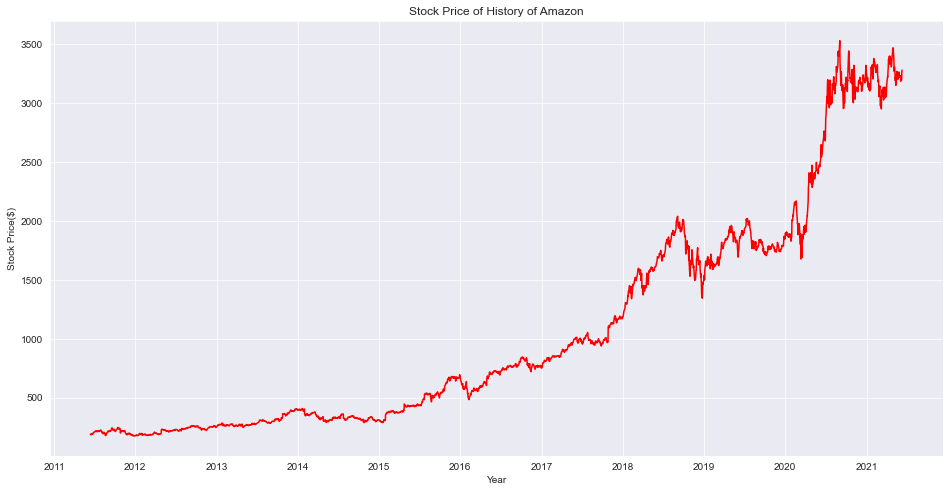

In [161]:
plt.figure(figsize = (16,8))
plt.plot(df_amazon_cleaned["Date"], df_amazon_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Amazon")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

Amazon Data is Cleaned now...............

## Preprocessing of Apple Data:

In [162]:
# Read Apple Data
df_apple = pd.read_csv("HistoricalData_APPLE.csv")
df_apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$127.13,56877940,$127.21,$127.75,$126.52
1,06/08/2021,$126.74,74403770,$126.6,$128.46,$126.2101
2,06/07/2021,$125.9,71057550,$126.17,$126.32,$124.8321
3,06/04/2021,$125.89,75169340,$124.07,$126.16,$123.85
4,06/03/2021,$123.54,76229170,$124.68,$124.85,$123.13


In [163]:
# Convert Date Column to Datetime datatype
df_apple["Date"] = pd.to_datetime(df_apple["Date"])
print(df_apple.head())

        Date Close/Last    Volume     Open     High        Low
0 2021-06-09    $127.13  56877940  $127.21  $127.75    $126.52
1 2021-06-08    $126.74  74403770   $126.6  $128.46  $126.2101
2 2021-06-07     $125.9  71057550  $126.17  $126.32  $124.8321
3 2021-06-04    $125.89  75169340  $124.07  $126.16    $123.85
4 2021-06-03    $123.54  76229170  $124.68  $124.85    $123.13


In [164]:
# Remove "$" Symbol in 'Close/Last', 'Open', 'High', 'Low'
df_apple["Close/Last"].replace("[$]", "", regex = True, inplace = True)
df_apple["Open"].replace("[$]", "", regex = True, inplace = True)
df_apple["High"].replace("[$]", "", regex = True, inplace = True)
df_apple["Low"].replace("[$]", "", regex = True, inplace = True)

In [165]:
# Convert 'Close/Last', 'Open', 'High', 'Low' to numeric columns
df_apple["Close/Last"] = pd.to_numeric(df_apple["Close/Last"])
df_apple["Open"] = pd.to_numeric(df_apple["Open"])
df_apple["High"] = pd.to_numeric(df_apple["High"])
df_apple["Low"] = pd.to_numeric(df_apple["Low"])

In [166]:
# Create "Symbol" column and "Sector" column
df_apple["Symbol"] = "AAPL"
df_apple["Sector"] = "Technology"

In [167]:
# Adding Target Column whether stoct price increased or decreased
targets = []
for i in range(len(df_apple)-1):
    if df_apple["Close/Last"].iloc[i] > df_apple["Close/Last"].iloc[i+1]:
        targets.append("Increased")
    else:
        targets.append("Decreased")
df_apple_cleaned = pd.concat([df_apple, pd.DataFrame({"Target" : targets})], axis = 1)
df_apple_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,127.13,56877940,127.21,127.75,126.5200,AAPL,Technology,Increased
1,2021-06-08,126.74,74403770,126.60,128.46,126.2101,AAPL,Technology,Increased
2,2021-06-07,125.90,71057550,126.17,126.32,124.8321,AAPL,Technology,Increased
3,2021-06-04,125.89,75169340,124.07,126.16,123.8500,AAPL,Technology,Increased
4,2021-06-03,123.54,76229170,124.68,124.85,123.1300,AAPL,Technology,Decreased


In [168]:
# As only one row is empty drop it
df_apple_cleaned = df_apple_cleaned.dropna()
df_apple_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,127.13,56877940,127.21,127.75,126.5200,AAPL,Technology,Increased
1,2021-06-08,126.74,74403770,126.60,128.46,126.2101,AAPL,Technology,Increased
2,2021-06-07,125.90,71057550,126.17,126.32,124.8321,AAPL,Technology,Increased
3,2021-06-04,125.89,75169340,124.07,126.16,123.8500,AAPL,Technology,Increased
4,2021-06-03,123.54,76229170,124.68,124.85,123.1300,AAPL,Technology,Decreased


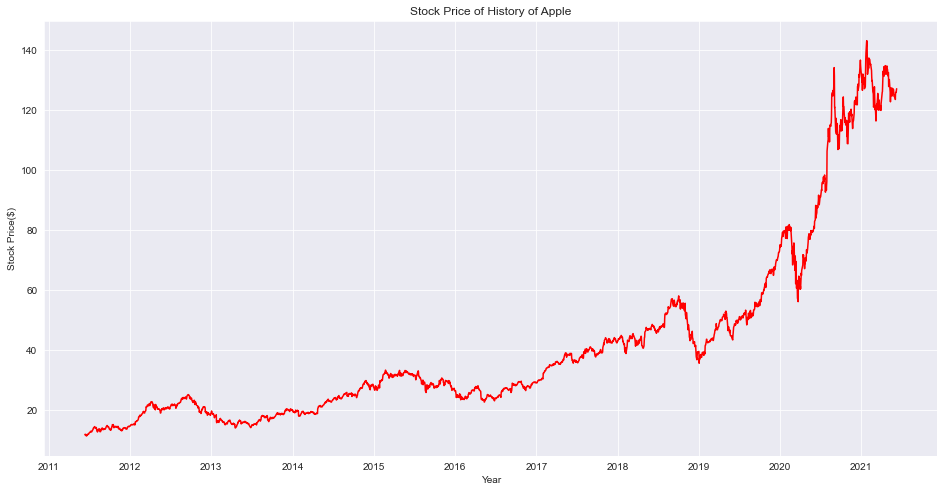

In [169]:
plt.figure(figsize = (16,8))
plt.plot(df_apple_cleaned["Date"], df_apple_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Apple")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Preprocessing of Cisco Data:

In [170]:
# Read Apple Data
df_cisco = pd.read_csv("HistoricalData_CSCO.csv")
df_cisco.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$54.02,14861230,$54.18,$54.42,$53.935
1,06/08/2021,$54.13,15329690,$53.97,$54.39,$53.89
2,06/07/2021,$53.92,14899750,$54.32,$54.44,$53.79
3,06/04/2021,$54.07,11676700,$53.435,$54.17,$53.435
4,06/03/2021,$53.33,17593100,$52.8,$53.555,$52.62


In [171]:
# Convert Date Column to Datetime datatype
df_cisco["Date"] = pd.to_datetime(df_cisco["Date"])
print(df_cisco.head())

        Date Close/Last    Volume     Open     High      Low
0 2021-06-09     $54.02  14861230   $54.18   $54.42  $53.935
1 2021-06-08     $54.13  15329690   $53.97   $54.39   $53.89
2 2021-06-07     $53.92  14899750   $54.32   $54.44   $53.79
3 2021-06-04     $54.07  11676700  $53.435   $54.17  $53.435
4 2021-06-03     $53.33  17593100    $52.8  $53.555   $52.62


In [172]:
# Remove "$" Symbol in 'Close/Last', 'Open', 'High', 'Low'
df_cisco["Close/Last"].replace("[$]", "", regex = True, inplace = True)
df_cisco["Open"].replace("[$]", "", regex = True, inplace = True)
df_cisco["High"].replace("[$]", "", regex = True, inplace = True)
df_cisco["Low"].replace("[$]", "", regex = True, inplace = True)

In [173]:
df_cisco.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,54.02,14861230,54.18,54.42,53.935
1,2021-06-08,54.13,15329690,53.97,54.39,53.89
2,2021-06-07,53.92,14899750,54.32,54.44,53.79
3,2021-06-04,54.07,11676700,53.435,54.17,53.435
4,2021-06-03,53.33,17593100,52.8,53.555,52.62


In [174]:
# Convert 'Close/Last', 'Open', 'High', 'Low' to numeric columns
df_cisco["Close/Last"] = pd.to_numeric(df_cisco["Close/Last"])
df_cisco["Open"] = pd.to_numeric(df_cisco["Open"])
df_cisco["High"] = pd.to_numeric(df_cisco["High"])
df_cisco["Low"] = pd.to_numeric(df_cisco["Low"])

In [175]:
df_cisco.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,54.02,14861230,54.180,54.420,53.935
1,2021-06-08,54.13,15329690,53.970,54.390,53.890
2,2021-06-07,53.92,14899750,54.320,54.440,53.790
3,2021-06-04,54.07,11676700,53.435,54.170,53.435
4,2021-06-03,53.33,17593100,52.800,53.555,52.620


In [176]:
# Create "Symbol" column and "Sector" column
df_cisco["Symbol"] = "CSCO"
df_cisco["Sector"] = "Technology"

In [177]:
df_cisco.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector
0,2021-06-09,54.02,14861230,54.180,54.420,53.935,CSCO,Technology
1,2021-06-08,54.13,15329690,53.970,54.390,53.890,CSCO,Technology
2,2021-06-07,53.92,14899750,54.320,54.440,53.790,CSCO,Technology
3,2021-06-04,54.07,11676700,53.435,54.170,53.435,CSCO,Technology
4,2021-06-03,53.33,17593100,52.800,53.555,52.620,CSCO,Technology


In [178]:
# Adding Target Column whether stoct price increased or decreased
targets = []
for i in range(len(df_cisco)-1):
    if df_cisco["Close/Last"].iloc[i] > df_cisco["Close/Last"].iloc[i+1]:
        targets.append("Increased")
    else:
        targets.append("Decreased")
df_cisco_cleaned = pd.concat([df_cisco, pd.DataFrame({"Target" : targets})], axis = 1)
df_cisco_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,54.02,14861230,54.180,54.420,53.935,CSCO,Technology,Decreased
1,2021-06-08,54.13,15329690,53.970,54.390,53.890,CSCO,Technology,Increased
2,2021-06-07,53.92,14899750,54.320,54.440,53.790,CSCO,Technology,Decreased
3,2021-06-04,54.07,11676700,53.435,54.170,53.435,CSCO,Technology,Increased
4,2021-06-03,53.33,17593100,52.800,53.555,52.620,CSCO,Technology,Increased


In [179]:
# As only one row is empty drop it
df_cisco_cleaned = df_cisco_cleaned.dropna()
df_cisco_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,54.02,14861230,54.180,54.420,53.935,CSCO,Technology,Decreased
1,2021-06-08,54.13,15329690,53.970,54.390,53.890,CSCO,Technology,Increased
2,2021-06-07,53.92,14899750,54.320,54.440,53.790,CSCO,Technology,Decreased
3,2021-06-04,54.07,11676700,53.435,54.170,53.435,CSCO,Technology,Increased
4,2021-06-03,53.33,17593100,52.800,53.555,52.620,CSCO,Technology,Increased


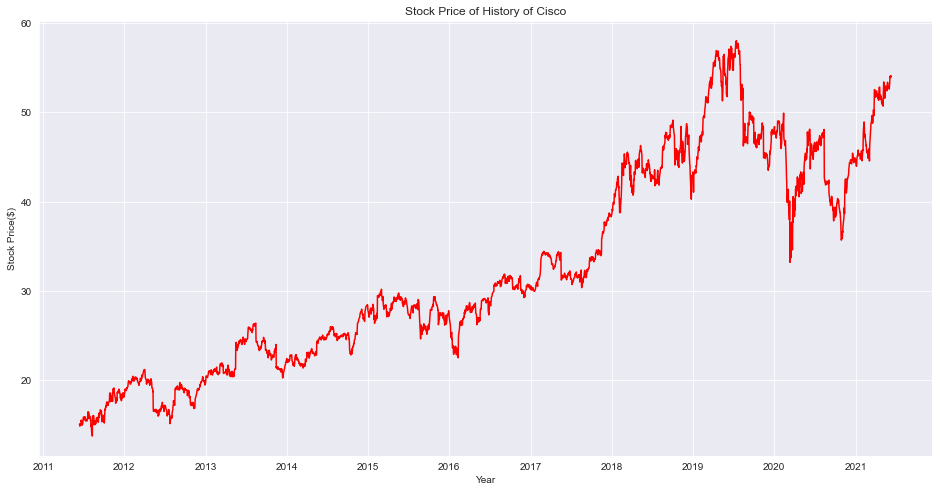

In [180]:
plt.figure(figsize = (16,8))
plt.plot(df_cisco_cleaned["Date"], df_cisco_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Cisco")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Preprocessing of Facebook Data:

In [181]:
def preprocess(filepath, symbol, sector):

    df = pd.read_csv(filepath)

    # Convert Date Column to Datetime datatype
    df["Date"] = pd.to_datetime(df["Date"])

    # Remove "$" Symbol in 'Close/Last', 'Open', 'High', 'Low'
    df["Close/Last"].replace("[$]", "", regex = True, inplace = True)
    df["Open"].replace("[$]", "", regex = True, inplace = True)
    df["High"].replace("[$]", "", regex = True, inplace = True)
    df["Low"].replace("[$]", "", regex = True, inplace = True)

    # Convert 'Close/Last', 'Open', 'High', 'Low' to numeric columns
    df["Close/Last"] = pd.to_numeric(df["Close/Last"])
    df["Open"] = pd.to_numeric(df["Open"])
    df["High"] = pd.to_numeric(df["High"])
    df["Low"] = pd.to_numeric(df["Low"])

    # Create "Symbol" column and "Sector" column
    df["Symbol"] = symbol
    df["Sector"] = sector

    # Adding Target Column whether stoct price increased or decreased
    targets = []
    for i in range(len(df)-1):
        if df["Close/Last"].iloc[i] > df["Close/Last"].iloc[i+1]:
            targets.append("Increased")
        else:
            targets.append("Decreased")
    df_cleaned = pd.concat([df, pd.DataFrame({"Target" : targets})], axis = 1)

    # As only one row is empty drop it
    df_cleaned = df_cleaned.dropna()

    return df_cleaned

In [182]:
df_facebook_cleaned = preprocess(filepath = "HistoricalData_FB.csv", symbol = "FB", sector = "Technology")

In [183]:
df_facebook_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,330.25,13727950,335.74,336.8000,330.00,FB,Technology,Decreased
1,2021-06-08,333.68,14580460,336.70,338.2999,332.24,FB,Technology,Decreased
2,2021-06-07,336.58,20136710,329.48,337.6900,328.93,FB,Technology,Increased
3,2021-06-04,330.35,13289380,325.90,332.4550,325.18,FB,Technology,Increased
4,2021-06-03,326.04,12610790,325.78,327.3750,323.48,FB,Technology,Decreased


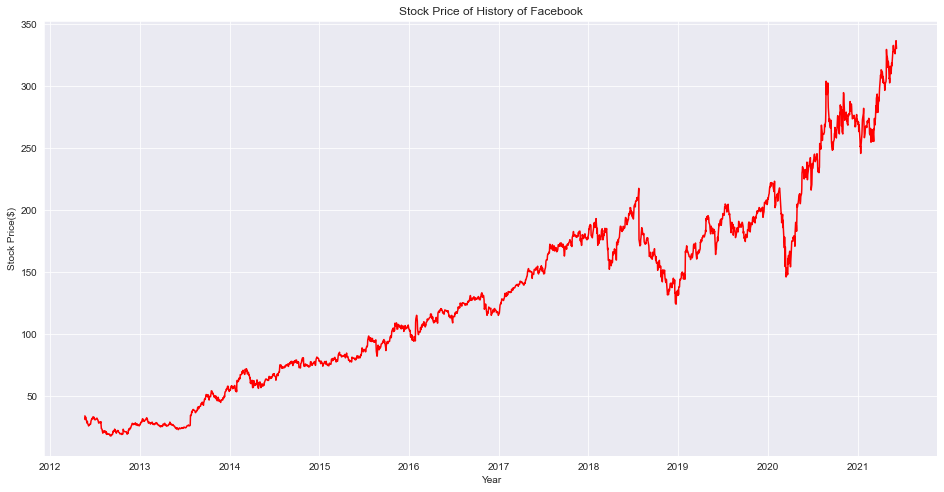

In [184]:
plt.figure(figsize = (16,8))
plt.plot(df_facebook_cleaned["Date"], df_facebook_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Facebook")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Preprocessing of Qualcomm Data:

In [185]:
df_qualcomm_cleaned = preprocess(filepath = "HistoricalData_QCOM.csv", symbol = "QCOM", sector = "Technology")
df_qualcomm_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,132.89,6717243,135.105,135.3500,132.79,QCOM,Technology,Decreased
1,2021-06-08,134.20,9657889,134.060,135.3895,133.00,QCOM,Technology,Increased
2,2021-06-07,133.32,5563253,133.700,133.7700,132.64,QCOM,Technology,Decreased
3,2021-06-04,134.34,7416675,132.525,135.0500,132.20,QCOM,Technology,Increased
4,2021-06-03,131.78,6643997,132.650,133.3900,131.42,QCOM,Technology,Decreased


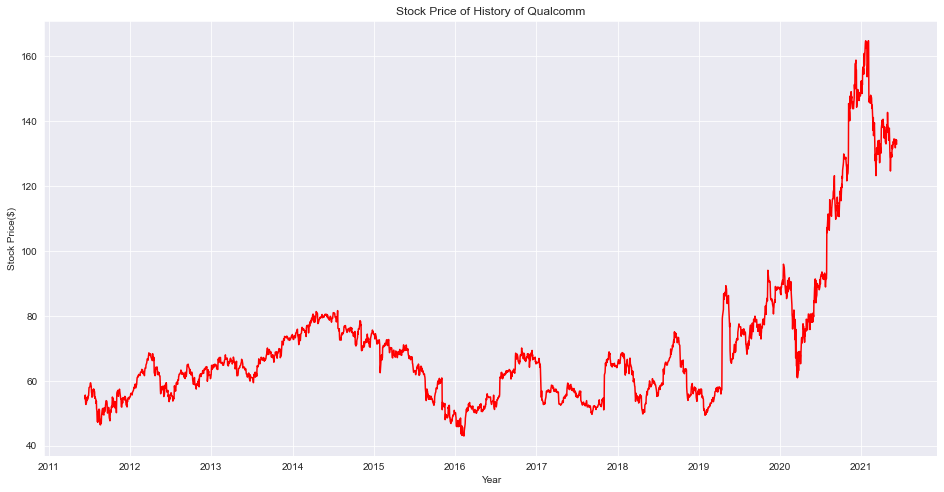

In [186]:
plt.figure(figsize = (16,8))
plt.plot(df_qualcomm_cleaned["Date"], df_qualcomm_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Qualcomm")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Preprocessing of Starbucks Data:

In [187]:
df_starbucks_cleaned = preprocess(filepath = "HistoricalData_SBUX.csv", symbol = "SBUX", sector = "Consumer_Cyclical")
df_starbucks_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,111.39,3669725,111.736,112.1900,111.33,SBUX,Consumer_Cyclical,Decreased
1,2021-06-08,111.52,4669852,111.380,111.9900,110.86,SBUX,Consumer_Cyclical,Increased
2,2021-06-07,111.33,4009023,111.980,112.2768,110.99,SBUX,Consumer_Cyclical,Decreased
3,2021-06-04,111.99,4477543,111.620,112.0650,111.05,SBUX,Consumer_Cyclical,Increased
4,2021-06-03,111.12,5723894,112.010,112.2400,110.15,SBUX,Consumer_Cyclical,Decreased


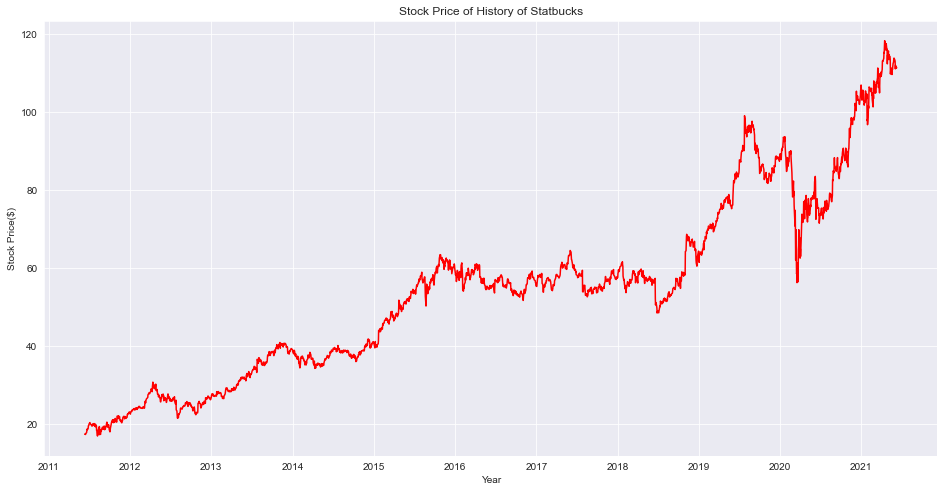

In [188]:
plt.figure(figsize = (16,8))
plt.plot(df_starbucks_cleaned["Date"], df_starbucks_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Statbucks")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Proprocessing Tesla Data:

In [189]:
df_tesla_cleaned = preprocess(filepath = "HistoricalData_TSLA.csv", symbol = "TSLA", sector = "Capital_Goods")
df_tesla_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,598.78,16584570,602.170,611.79,597.6301,TSLA,Capital_Goods,Decreased
1,2021-06-08,603.59,26053410,623.010,623.09,595.5000,TSLA,Capital_Goods,Decreased
2,2021-06-07,605.13,22543680,591.825,610.00,582.8800,TSLA,Capital_Goods,Increased
3,2021-06-04,599.05,24036900,579.710,600.61,577.2000,TSLA,Capital_Goods,Increased
4,2021-06-03,572.84,30111890,601.800,604.55,571.2200,TSLA,Capital_Goods,Decreased


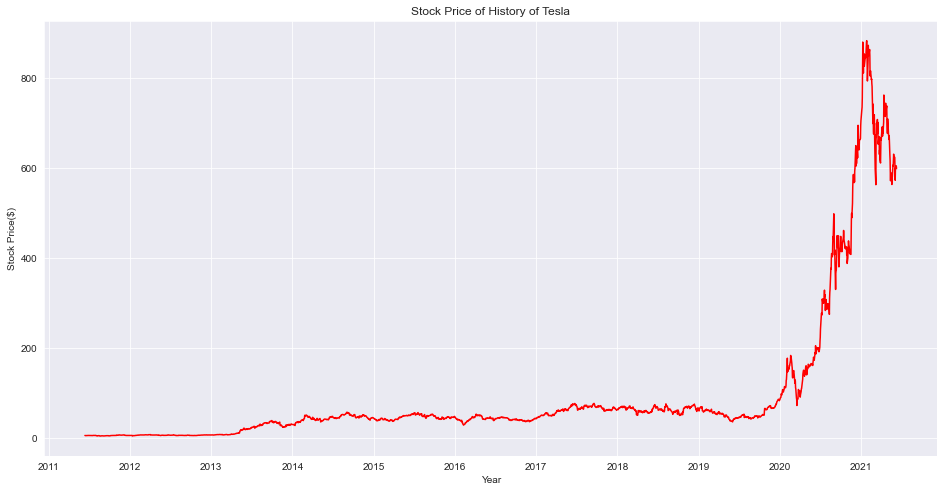

In [190]:
plt.figure(figsize = (16,8))
plt.plot(df_tesla_cleaned["Date"], df_tesla_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Tesla")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Proprocessing Microsoft Data:

In [191]:
df_microsoft_cleaned = preprocess(filepath = "MSFT.csv", symbol = "MSFT", sector = "Technology")
df_microsoft_cleaned.head()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,253.59,17937630,253.81,255.53,253.21,MSFT,Technology,Increased
1,2021-06-08,252.57,22455000,255.16,256.01,252.51,MSFT,Technology,Decreased
2,2021-06-07,253.81,23079170,249.98,254.09,249.81,MSFT,Technology,Increased
3,2021-06-04,250.79,25281090,247.76,251.65,247.51,MSFT,Technology,Increased
4,2021-06-03,245.71,25307710,245.22,246.34,243.00,MSFT,Technology,Decreased


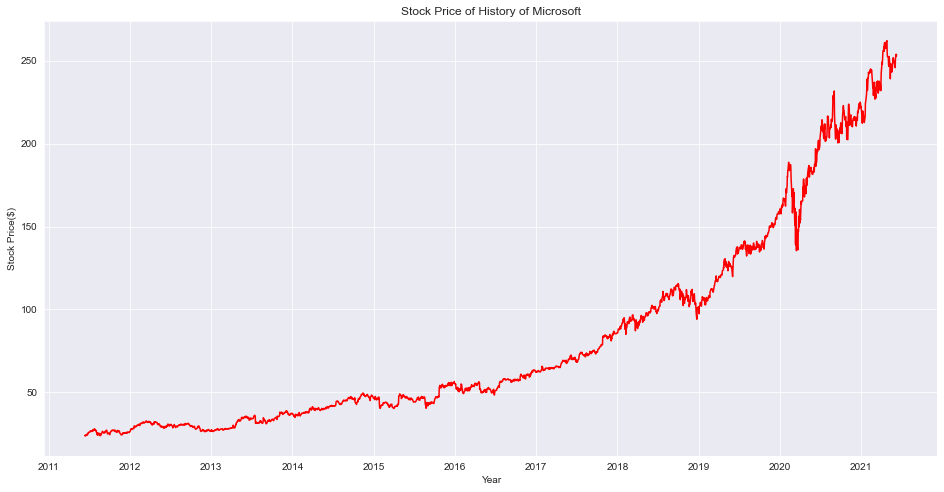

In [192]:
plt.figure(figsize = (16,8))
plt.plot(df_microsoft_cleaned["Date"], df_microsoft_cleaned["Close/Last"], color = "red")
plt.title("Stock Price of History of Microsoft")
plt.xlabel("Year")
plt.ylabel("Stock Price($)")
plt.show()

## Combining All Dataframes of all companies

In [194]:
final_df = pd.concat([df_amazon_cleaned, 
                      df_apple_cleaned,
                      df_cisco_cleaned,
                      df_facebook_cleaned,
                      df_qualcomm_cleaned,
                      df_starbucks_cleaned,
                      df_tesla_cleaned,
                      df_microsoft_cleaned], axis = 0)

final_df.head()                      

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
0,2021-06-09,3281.15,2455530,3272.87,3297.5800,3270.70,AMZN,Consumer_Services,Increased
1,2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01,AMZN,Consumer_Services,Increased
2,2021-06-07,3198.01,2215756,3197.33,3208.0000,3172.20,AMZN,Consumer_Services,Decreased
3,2021-06-04,3206.22,2249749,3212.00,3221.0000,3198.81,AMZN,Consumer_Services,Increased
4,2021-06-03,3187.01,2398293,3204.23,3214.4350,3184.03,AMZN,Consumer_Services,Decreased


In [195]:
final_df.tail()

,Date,Close/Last,Volume,Open,High,Low,Symbol,Sector,Target
2510,2011-06-17,24.260,83318310,24.22,24.30,23.98,MSFT,Technology,Increased
2511,2011-06-16,23.995,57077140,23.75,24.10,23.65,MSFT,Technology,Increased
2512,2011-06-15,23.740,49274190,24.00,24.01,23.67,MSFT,Technology,Decreased
2513,2011-06-14,24.220,42862050,24.30,24.45,24.19,MSFT,Technology,Increased
2514,2011-06-13,24.040,47558330,23.79,24.19,23.70,MSFT,Technology,Increased


In [196]:
final_df.shape

(19883, 9)

In [197]:
final_df.describe()

,Close/Last,Volume,Open,High,Low
count,19883.000000,1.988300e+04,19883.000000,19883.000000,19883.00000
mean,197.206331,4.970112e+07,197.245477,199.455327,194.82676
std,472.725483,1.011293e+08,473.090505,478.259788,467.12614
min,4.390000,8.813370e+05,4.386000,4.622000,4.30000
25%,33.750000,8.632393e+06,33.707000,34.040000,33.34000
50%,56.650000,1.962657e+07,56.600000,57.165000,56.07000
75%,117.690000,3.984614e+07,117.912500,118.980000,116.70500
max,3531.450000,1.498071e+09,3547.000000,3554.000000,3486.68500


In [198]:
final_df.to_csv("final_dataset.csv", index = False)